In [46]:
library(ggplot2)
library(tidyverse)
library(plyr)
library(dplyr)
library(ggpubr)
library(reshape2)
library(stringr)

# Hyperparameters of SLAT

In [65]:
df <- read.csv("../results/hyperparam.csv")
df %>% head(3)

,dataset,datasize,k_neighbors,feature_type,epochs,LGCN_layer,mlp_hidden,hidden_size,alpha,anchor_scale,⋯,lr_wd,lr_recon,batch_d_per_iter,batch_r_per_iter,smooth,seed,celltype_score,global_score,region_score,run_time
,<chr>,<int>,<int>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,stereo_mouse_embryo,8000,20,PCA,10,1,256,2048,0.01,0.8,⋯,1e-04,0.01,7,10,20,0,0.700000,0.681750,0.951375,11.97340
2,stereo_mouse_embryo,8000,20,PCA,10,1,256,2048,0.01,0.8,⋯,1e-04,0.01,7,10,20,1,0.698000,0.677875,0.950250,12.16699
3,stereo_mouse_embryo,8000,20,PCA,10,1,256,2048,0.01,0.8,⋯,1e-04,0.01,7,10,20,2,0.699625,0.681875,0.953375,19.85813


Coordinate system already present. Adding new coordinate system, which will replace the existing one.



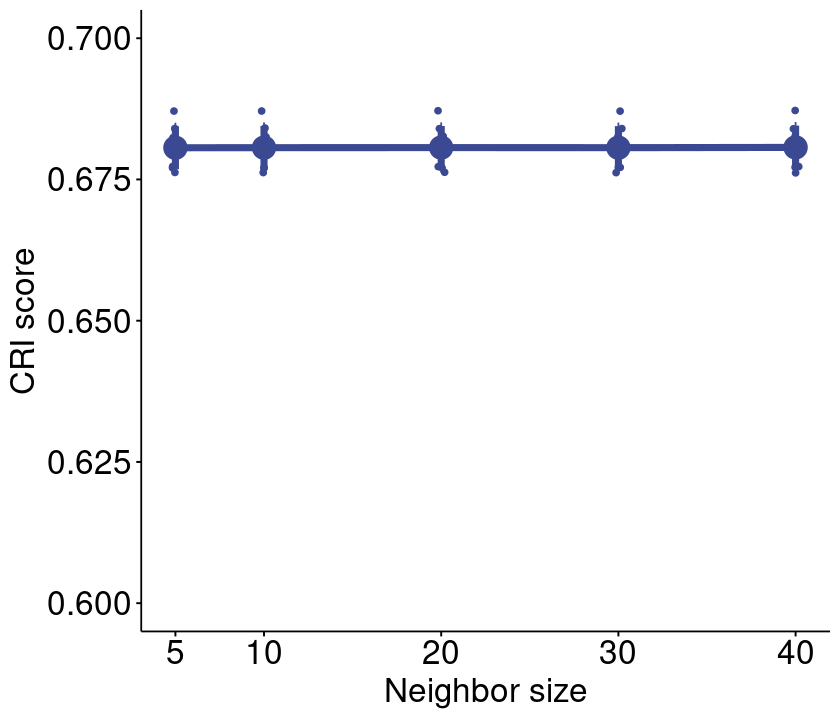

In [64]:
ggline(df, 'k_neighbors','global_score', add = c("mean_sd", "jitter"), point.size = 5, size = 2, ylim = c(0.6, 0.7), color = "#3b4992") %>%
            ggpar(font.x = 20, font.y = 20, font.legend = 20, font.subtitle = 20, font.xtickslab = 20, font.ytickslab = 20, legend = "right", 
            xlab = "Neighbor size", ylab = "CRI score", ylim = c(0.6, 0.7)) + 
            # facet_wrap(~dataset, scales="free") +
            rremove("legend") + scale_x_continuous(breaks = c(5,10,20,30,40))

In [66]:
default_param <- c(epochs = 6, LGCN_layer = 1, mlp_hidden = 256, hidden_size = 2048, alpha = 0.01, anchor_scale = "0.8",
                   lr_mlp = 0.0001, lr_wd = 0.0001, lr_recon = 0.01, batch_d_per_iter = 7, batch_r_per_iter = 10, smooth=20)
scores <- c("global_score")

In [67]:
plot_param <- function(df, score, variable) {
    # df <- df[c("dataset", "seed", score, variable, 'feature_type')] %>% melt(variable.name = "Index", value.name = "Score",id.vars = c("dataset", "seed", variable))
    plot <- df %>% ggline(variable, score, add = c("mean_sd", "jitter"), color = "feature_type", palette = "aaas", point.size = 5, size = 2,
                            xlab = str_replace_all(str_to_title(variable), "_", " "), ylab = "CRI score") %>%
            ggpar(font.x = 20, font.y = 20, font.legend = 20, font.subtitle = 20, font.xtickslab = 20, font.ytickslab = 20, legend = "right", ylim = c(0.6, 0.7)) + 
            # facet_wrap(~dataset, scales="free") +
            rremove("legend")
            # scale_fill_discrete(labels=c(str_replace(str_to_title(score),"_"," ")))
    # print(variable)
    if (str_detect(variable, 'hidden')) {
        plot <- plot + scale_x_continuous(trans='log2')
    } else if (str_detect(variable, 'batch_d_per_iter')) {
       plot <- plot + scale_x_continuous(breaks = c(1,3,5,7,9))
    }
    return(plot)
}

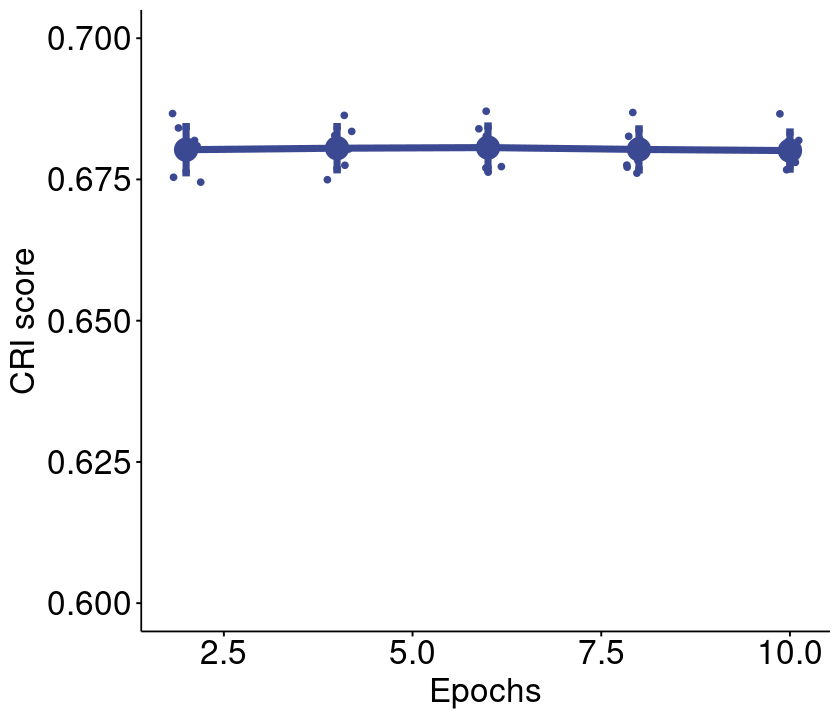

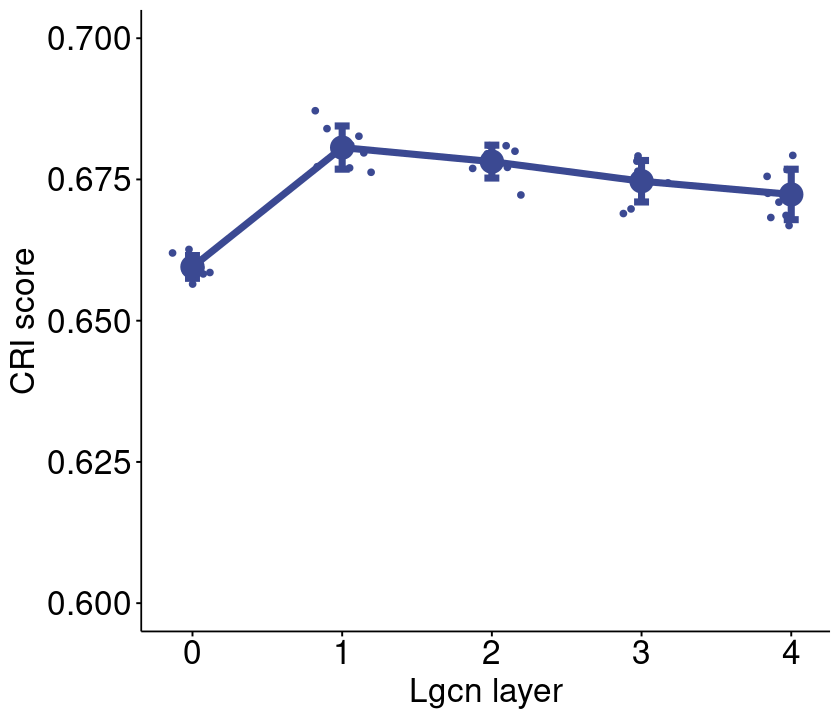

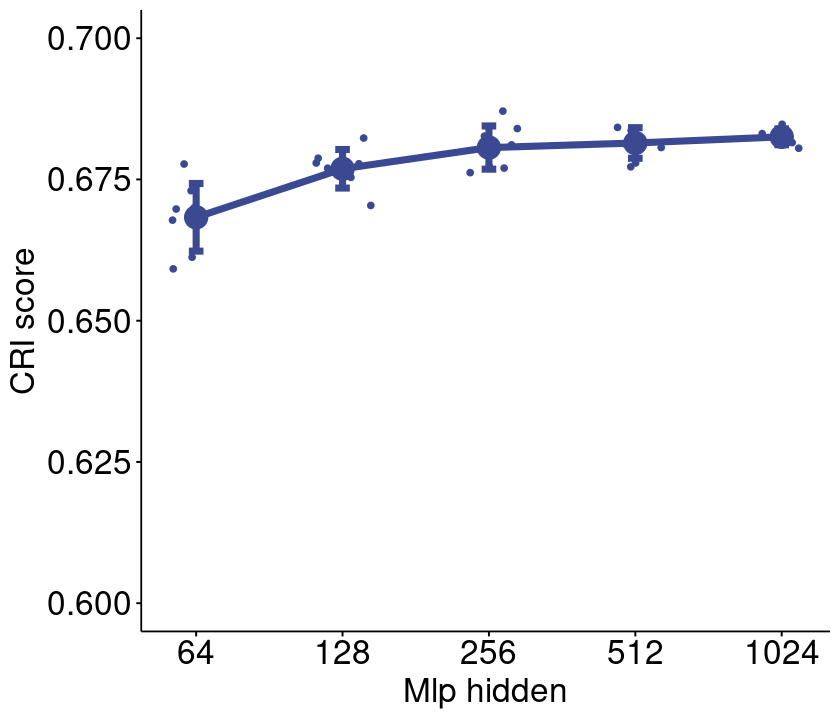

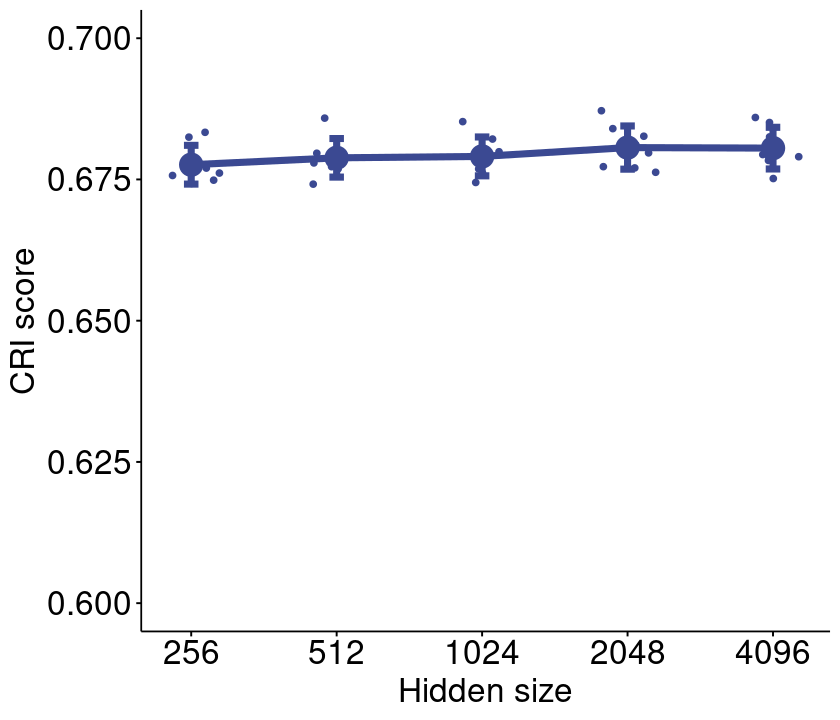

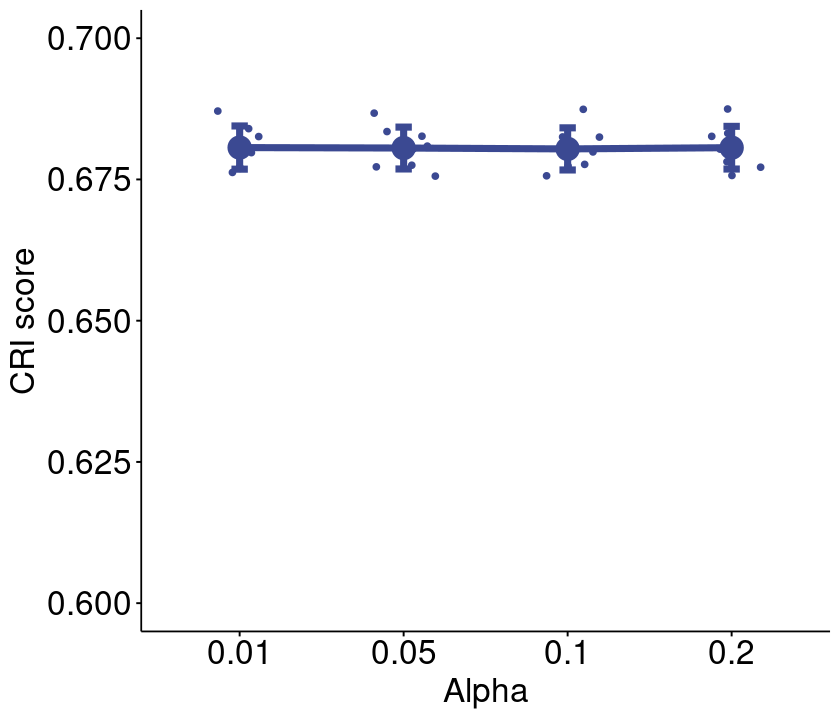

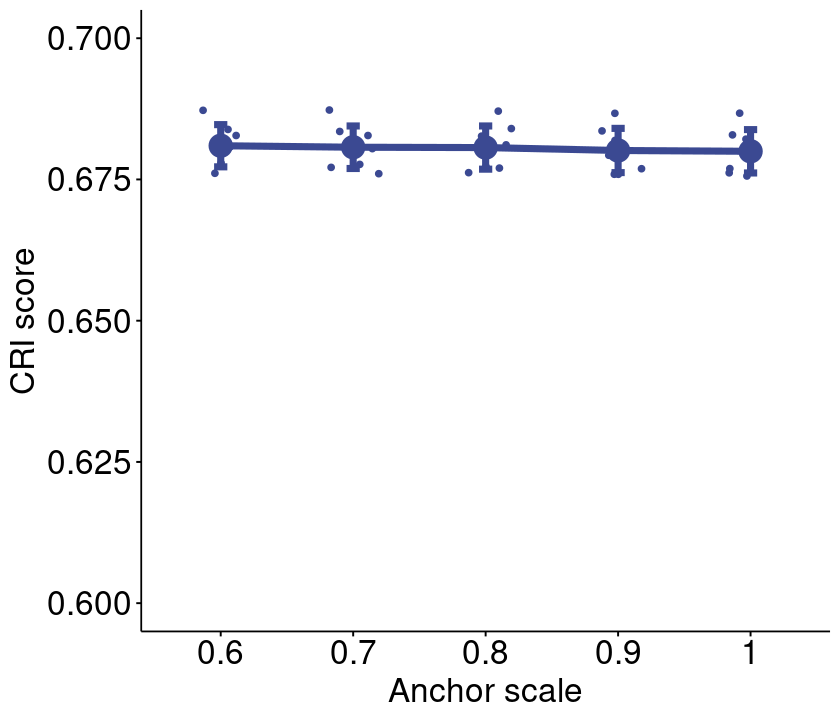

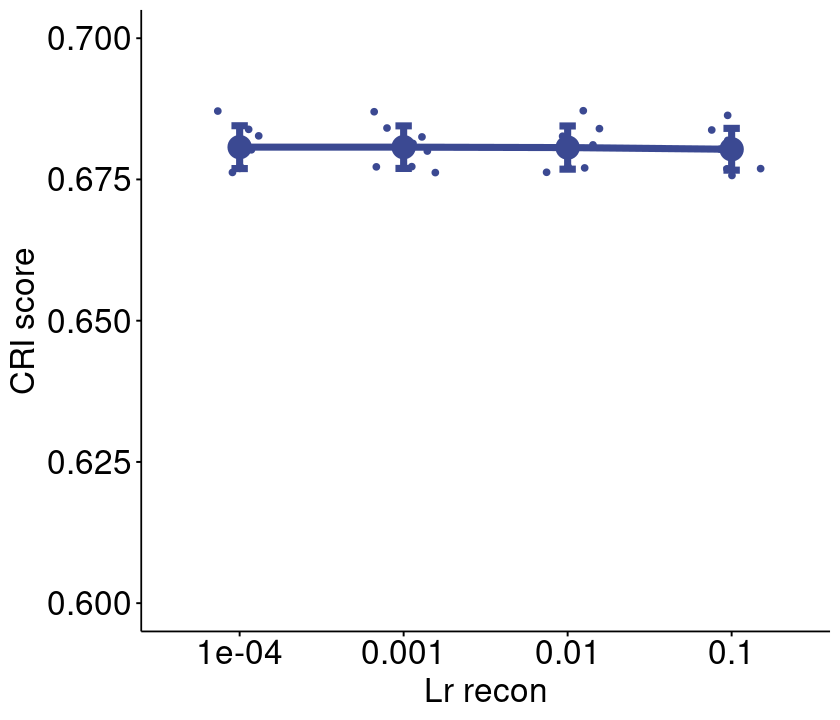

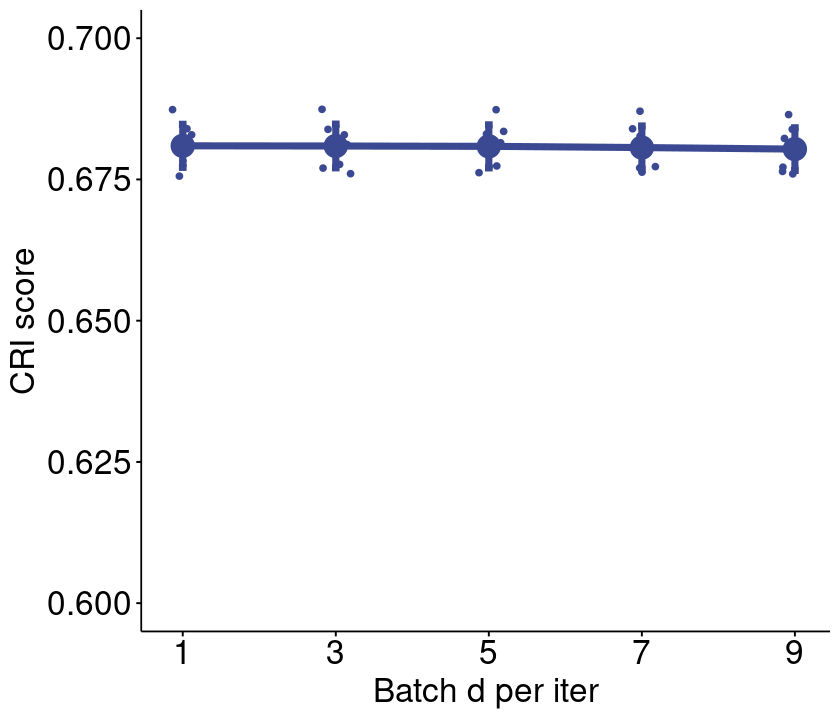

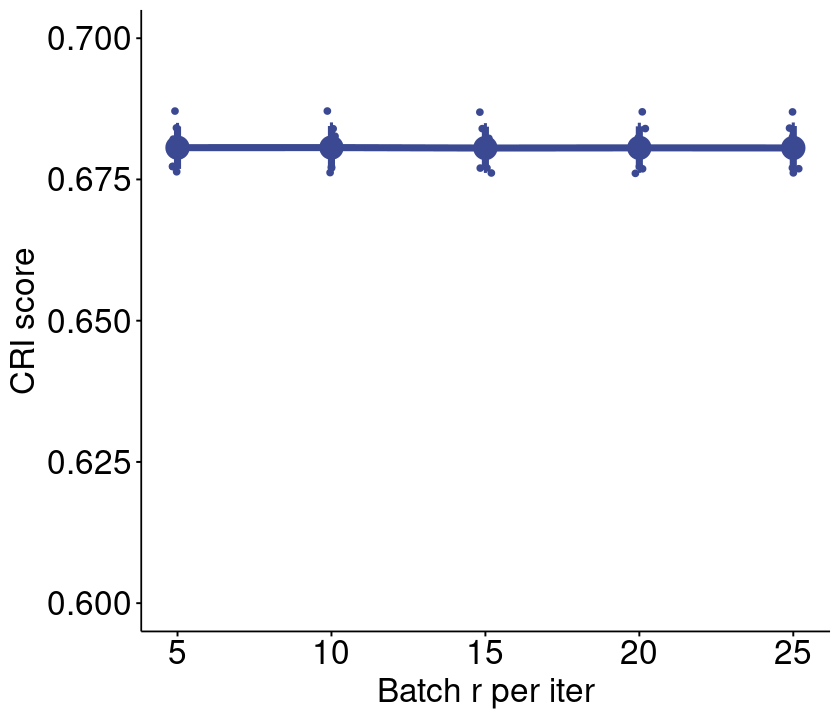

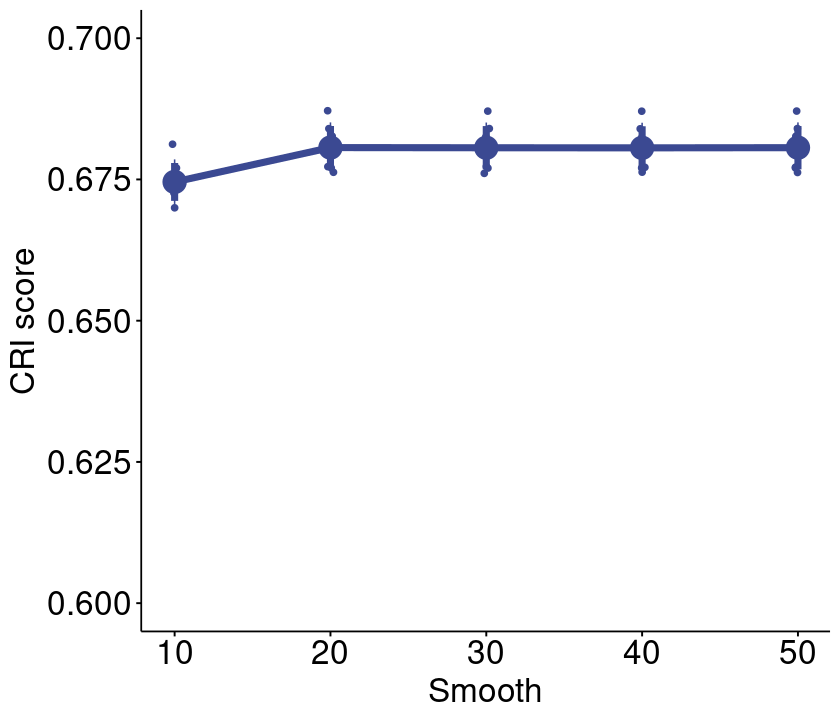

In [68]:
options(repr.plot.width = 7, repr.plot.height = 6)
for (param in names(default_param)) {
    # param %>% print()
    tmp_default_param <- default_param[names(default_param) != param]
    df_filter <- df
    for (param_filter in names(tmp_default_param)) {
        df_filter <- df_filter[which(df_filter[[param_filter]] == tmp_default_param[param_filter]), ]
        }
    if (length(unique(df_filter[[param]])) == 1) {
        next
    }
    for (score in scores) {
        p <- plot_param(df_filter, score, param)
        print(p)
        }
    }


# LGCN only

In [7]:
df <- read.csv("../results/LGCN.csv")
df %>% head(3)

,dataset,datasize,LGCN_layer,k_neighbors,feature_type,celltype_score,global_score,region_score,run_time
,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,merfish_mouse_hypothalamic,8000,0,20,PCA,0.7219276,0.4290393,0.5864005,15.49725
2,merfish_mouse_hypothalamic,8000,0,20,harmony,0.7250468,0.4315346,0.5870243,23.82099
3,merfish_mouse_hypothalamic,8000,1,20,PCA,0.6986900,0.4465066,0.6319401,15.57335


Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$length - 1):
“NaNs produced”
Warning message in stats::qt(ci/2 + 0.5, data_sum$le

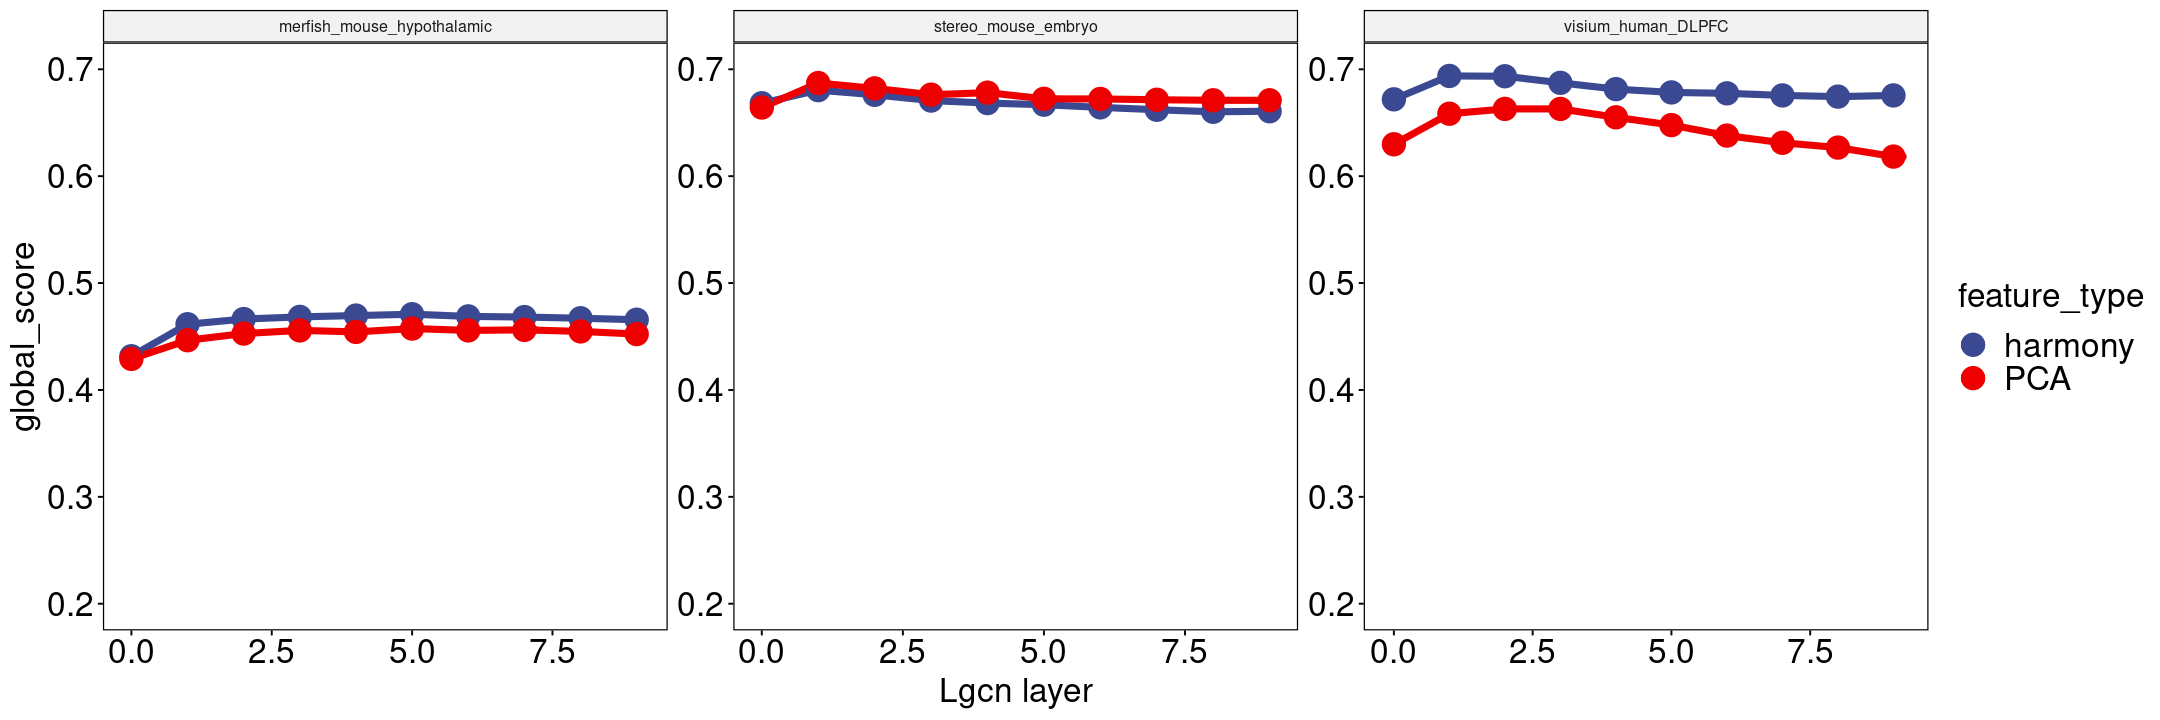

In [8]:
options(repr.plot.width = 18, repr.plot.height = 6)
df %>% ggline("LGCN_layer", "global_score", add = c("mean_sd", "jitter"), color = "feature_type", palette = "aaas", point.size = 5, size = 2,
                            xlab = str_replace(str_to_title("LGCN_layer"), "_", " "), facet.by='dataset') %>%
            ggpar(font.x = 20, font.y = 20, font.legend = 20, font.subtitle = 20, font.xtickslab = 20, font.ytickslab = 20, legend = "right", ylim = c(0.2, 0.7)) + 
            facet_wrap(~dataset, scales="free")